In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions


# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
readpath = os.getcwd().split(os.sep + 'data_2')[0]

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc = load_array[0]
ext_inh = load_array[1]

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

facecolor_ = '#EAEAEA'
facecolor_ = 'white'

folder = str(os.getcwd().split('data_2')[1])[1:]

In [53]:
ind0 = 20
dur = 500.

data.set_parameters(aln)

aln.params.ext_exc_current = ext_exc[ind0] * 5.
aln.params.ext_inh_current = ext_inh[ind0] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1 = aln.getZeroTarget()
target_1[:,0,:] = aln.rates_exc[0,-1] 
target_1[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3 = aln.getZeroTarget()
target_3[:,0,:] = aln.rates_exc[0,-1] 
target_3[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)

aln.params.ext_exc_current = ext_exc[50] * 5.
aln.params.ext_inh_current = ext_inh[50] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1b = aln.getZeroTarget()
target_1b[:,0,:] = aln.rates_exc[0,-1] 
target_1b[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3b = aln.getZeroTarget()
target_3b[:,0,:] = aln.rates_exc[0,-1] 
target_3b[:,1,:] = aln.rates_inh[0,-1]

In [54]:
def readcase(readpath, i):

    with open(readpath,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0][i]
    bestState_ = load_array[1][i]
    cost_ = load_array[2][i]
    costnode_ = load_array[3][i]
    weights_ = load_array[4][i]
        
    return bestControl_, bestState_, costnode_, weights_

In [55]:
savepath = os.path.join(os.getcwd().split('neurolib')[0], 'writing' + os.sep + 'paper1' + os.sep 
                        + 'Frontiers' + os.sep + 'images')
cols = [r'down $\rightarrow$ up, $L^1$, point a', r'down $\rightarrow$ up, $L^1$, point b',
        r'down $\rightarrow$ up, $L^2$, point a', r'down $\rightarrow$ up, $L^2$, point b',
        r'up $\rightarrow$ down, $L^1$, point a', r'up $\rightarrow$ down, $L^1$, point b',
        r'up $\rightarrow$ down, $L^2$, point a', r'up $\rightarrow$ down, $L^2$, point b'
       ] 

In [56]:
def plot_control_current(model, control_array, state_array, weight_array,
                         target_, title, costnode_array, y_lim, y_ticks, x_ticks,
                         path_=savepath, filename_=''):
    
    dt = model.params.dt
    control_factor = model.params.C/1000.
    output_vars = model.output_vars
    
    n_subfigs = len(control_array)
    columns = len(control_array[0])
    rows = 2
    
    fig = plt.figure(figsize=(columns*5, n_subfigs*5), constrained_layout=True)
    subfigs = fig.subfigures(n_subfigs, 1)
    
    linewidth_ = 3    
    fontsize_ = 18
    
    #fig.text(0., 1., 'A', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.666, 'B', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.333, 'C', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.25, 'D', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    
    props = dict(boxstyle='round', facecolor='grey', alpha=0.2)

    for i in range(n_subfigs):
            
        ax = subfigs[i].subplots(rows, columns)
        
        ##################### go through all controls in control array 
        
        for j in range(columns):
                        
            control_ = control_array[i][j]
            state_ = state_array[i][j]
            costnode_ = costnode_array[i][j]
            dur = (control_.shape[2] - 201.) * dt
            T = control_.shape[2] - 200
            weight = weight_array[i][j]
            
            time_ = np.arange(0., round(dur + dt, 1), dt)
            
            if 'Wmax' in filename_:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms, ' + r'$W_1 = ${:.2f}'.format(weight),
                                       fontsize=fontsize_)
            else:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms',
                                       fontsize=fontsize_)
            
            ax[0,j].plot(time_, target_[0,0,:T], '--', linewidth = 3, color=exc_red)
            ax[0,j].plot(time_, target_[0,1,:T], '--', linewidth = 3, color=inh_blue)
            
            ax[0,j].plot(time_, state_[0,0,100:-100], linewidth=linewidth_, color=exc_red)
            ax[0,j].plot(time_, state_[0,1,100:-100], linewidth=linewidth_, color=inh_blue)                     
            ax[1,j].plot(time_, control_[0,0,100:-100] * control_factor, linewidth=linewidth_, color=exc_red)
            ax[1,j].plot(time_, control_[0,1,100:-100] * control_factor, linewidth=linewidth_, color=inh_blue)                
                
            ax[0,j].axvspan( dur - 20., dur+1., facecolor='grey', alpha=0.2, zorder=-1, hatch='///', edgecolor = 'grey')

            ax[0,j].set_xticks([])
            ax[0,j].get_xaxis().set_visible(False)
            ax[1,j].set_xlabel('t [ms]', fontsize=fontsize_) 
            ax[0,j].set_yticks(np.arange(0., 105., 25.))
            if j != 0:
                ax[0,j].set_yticks([])
            ax[0,j].set_ylim([-5., 120.])
            
            ax[1,j].set_yticks(y_ticks[i][j])
            ax[1,j].set_ylim(y_lim[i][j])
            ax[1,j].set_xticks(x_ticks[i][j])
            
            
            if np.abs(costnode_[2][0][0]) < 1e-12:
                costnode_[2][0][0] = 0.
            if np.abs(costnode_[2][0][1]) < 1e-12:
                costnode_[2][0][1] = 0.
            
            textstr = str( r'$F_P = $' + '{:#.4g}'.format(costnode_[0][0][0])
                        + '\n' + r'$F_{1,E} =$' + '{:#.4g}'.format(costnode_[2][0][0]) 
                        + '\n' + r'$F_{1,I} =$' + '{:#.4g}'.format(costnode_[2][0][1])
                         )
            
            ax[0,j].text(0.05, 0.9, textstr, transform=ax[0,j].transAxes, fontsize=fontsize_,
            verticalalignment='top', horizontalalignment='left', bbox=props)

            for l in range(rows):
                ax[l,j].tick_params(axis='x', labelsize=fontsize_)
                ax[l,j].tick_params(axis='y', labelsize=fontsize_)
                ax[l,j].set_xlim([0., dur])
                ax[l,j].grid(False)

            ax[0,0].set_ylabel('Rates [Hz]', fontsize=fontsize_)      
            ax[1,0].set_ylabel('Control [nA]', fontsize=fontsize_)  

    #fig.suptitle(title, fontsize=fontsize_, y=1.03)
    fig.suptitle('Point a, current control', fontsize=fontsize_, y=1.03)
        
    plt.savefig(os.path.join(path_, filename_), bbox_inches='tight', facecolor=fig.get_facecolor(),
                edgecolor='none', dpi=300)
    plt.savefig( filename_, bbox_inches='tight', facecolor=fig.get_facecolor(),
                edgecolor='none', dpi=300)

In [44]:
i = 20
target_array = target_1

In [45]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j, costnode_[j][2][0][:2])
        if type(weights_[j]) == type(None):
            weights_[j] = [1., 0., 1.]

0 [1.25115182e-15 3.33115700e+00]
100 [1.25115182e-15 3.33115716e+00]
200 [1.25115181e-15 3.33115725e+00]
300 [1.25115172e-15 3.33115739e+00]
400 [1.25115162e-15 3.33115760e+00]
500 [1.25115161e-15 3.33115789e+00]
600 [1.25115161e-15 3.33115831e+00]
700 [1.25115161e-15 3.33115894e+00]
800 [1.25115161e-15 3.33115984e+00]
900 [1.25115161e-15 3.33116099e+00]
1000 [1.25115161e-15 3.33116274e+00]
1100 [1.25115161e-15 3.33116538e+00]
1200 [1.25115161e-15 3.33116907e+00]
1300 [1.25115161e-15 3.33117417e+00]
1400 [1.25115161e-15 3.33118082e+00]
1500 [1.25115160e-15 3.33119057e+00]
1600 [1.25115159e-15 3.33120578e+00]
1700 [1.25115158e-15 3.33122634e+00]
1800 [1.25115156e-15 3.33125572e+00]
1900 [1.25115153e-15 3.33129590e+00]
2000 [1.25115148e-15 3.33135758e+00]
2100 [1.25115139e-15 3.33144429e+00]
2200 [1.25115124e-15 3.33157102e+00]
2300 [1.25115100e-15 3.33174907e+00]
2400 [1.25115062e-15 3.33201434e+00]
2500 [1.25114997e-15 3.33238129e+00]
2600 [1.25114891e-15 3.33291176e+00]
2700 [1.25114

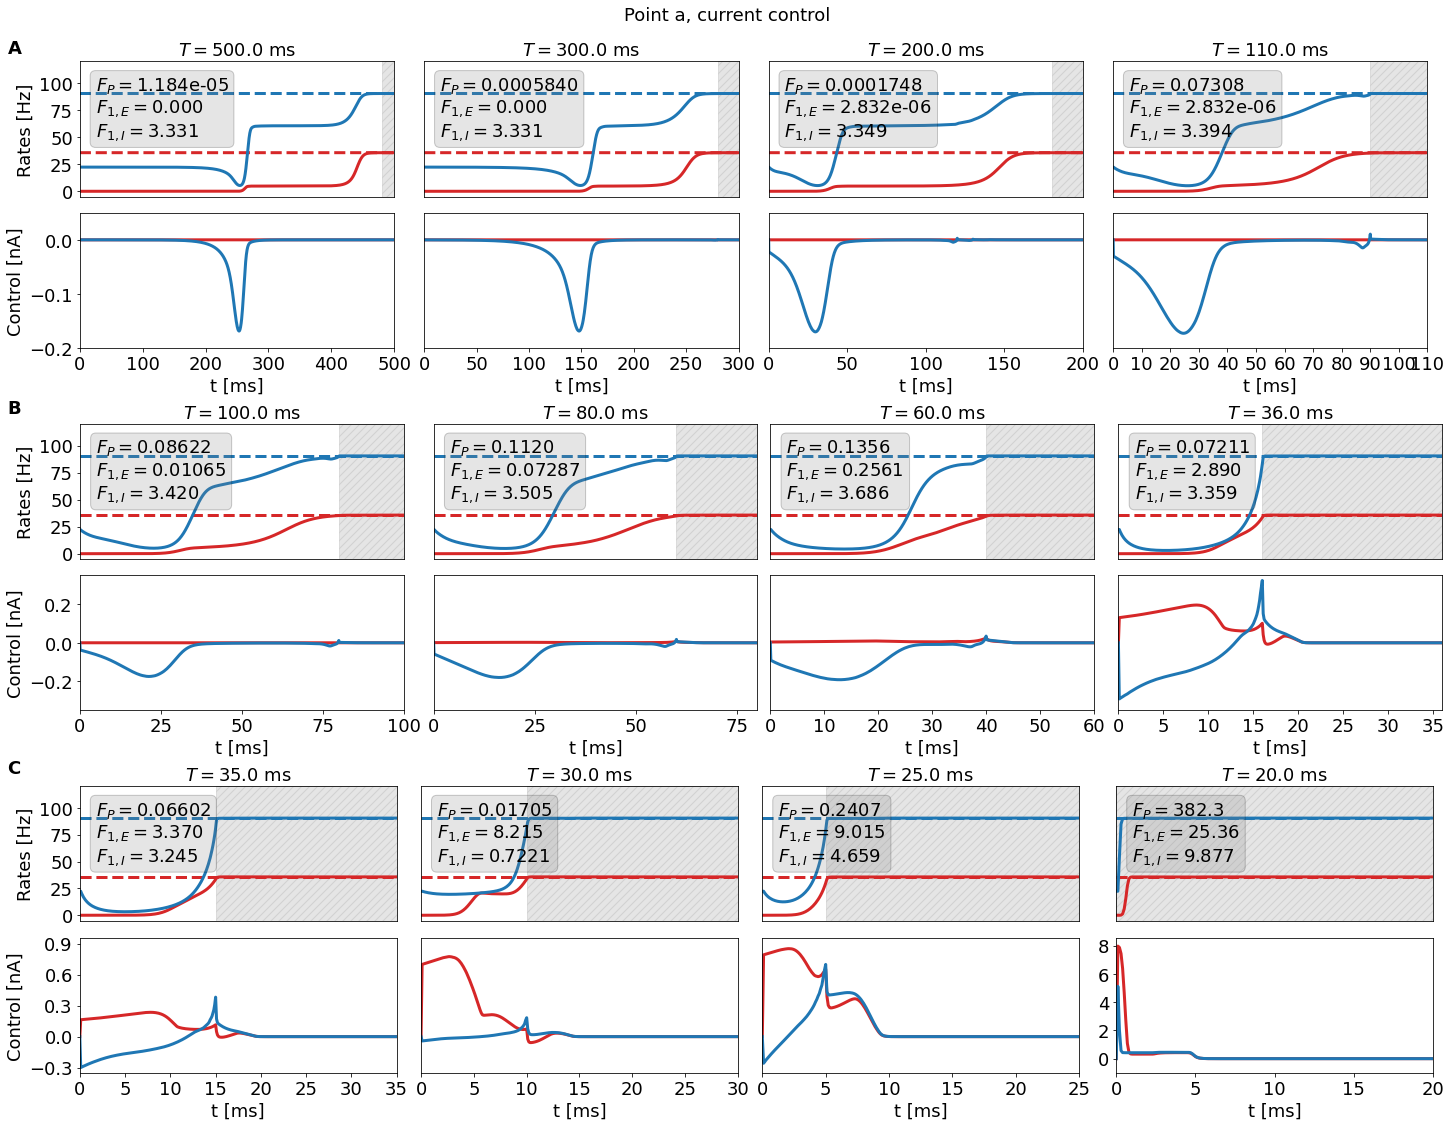

In [50]:
index_ = [ [0, 2000, 3000, 3900], 
          [4000, 4200, 4400, 4640], 
          [4650, 4700, 4750, 4800] ]

y_lim = [ [[-0.2, 0.05], [-0.2, 0.05], [-0.2, 0.05], [-0.2, 0.05] ],
          #[[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.35, 0.35], [-0.35, 0.35], [-0.35, 0.35], [-0.35, 0.35] ],
          [[-0.35, 0.95], [-.35, .95], [-.35, .95], [-1, 8.5] ]
        ]
        
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            #[[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4, 0.6], [], [], [] ],
            [np.arange(-0.3, .91, 0.3), [], [], np.arange(-0., 8.1, 2.)]
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 50.), np.arange(0., 501., 50.),
               np.arange(0., 501., 10.), np.arange(0., 501., 50.)],
            [np.arange(0., 300., 25.), np.arange(0., 300., 25.), np.arange(0., 300., 10.),
               np.arange(0., 300., 5.), np.arange(0., 300., 50.)],
            [np.arange(0., 300., 5.), np.arange(0., 300., 5.), np.arange(0., 100., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
               [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ]
                ]

plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

In [62]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3810
3820
3830
3840
3850
3860
3870
3880
3890
3900
3910
3920
3930
3940
3950
3960
3970
3980
3990
4000
4010
4020
4030
4040
4050
4060
4070
4080
4090
4100
4110
4120
4130
4140
4150
4160
4170
4180
4190
4200
4210
4220
4230
4240
4250
4260
4270
4280
4290
4300
4310
4320
4330
4340
4350
4360
4370
4380
4390
4400
4410
4420
4430
4440
4450
4460
4470
4480
4490
4500
4510
4520
4530
4540
4550
4560
4570
4580
4590
4600
4610
4620
4630
4640
4650
4660
4670
4680
4690
4700
4710
4720
4730
4740
4750
4760
4770
4780
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800


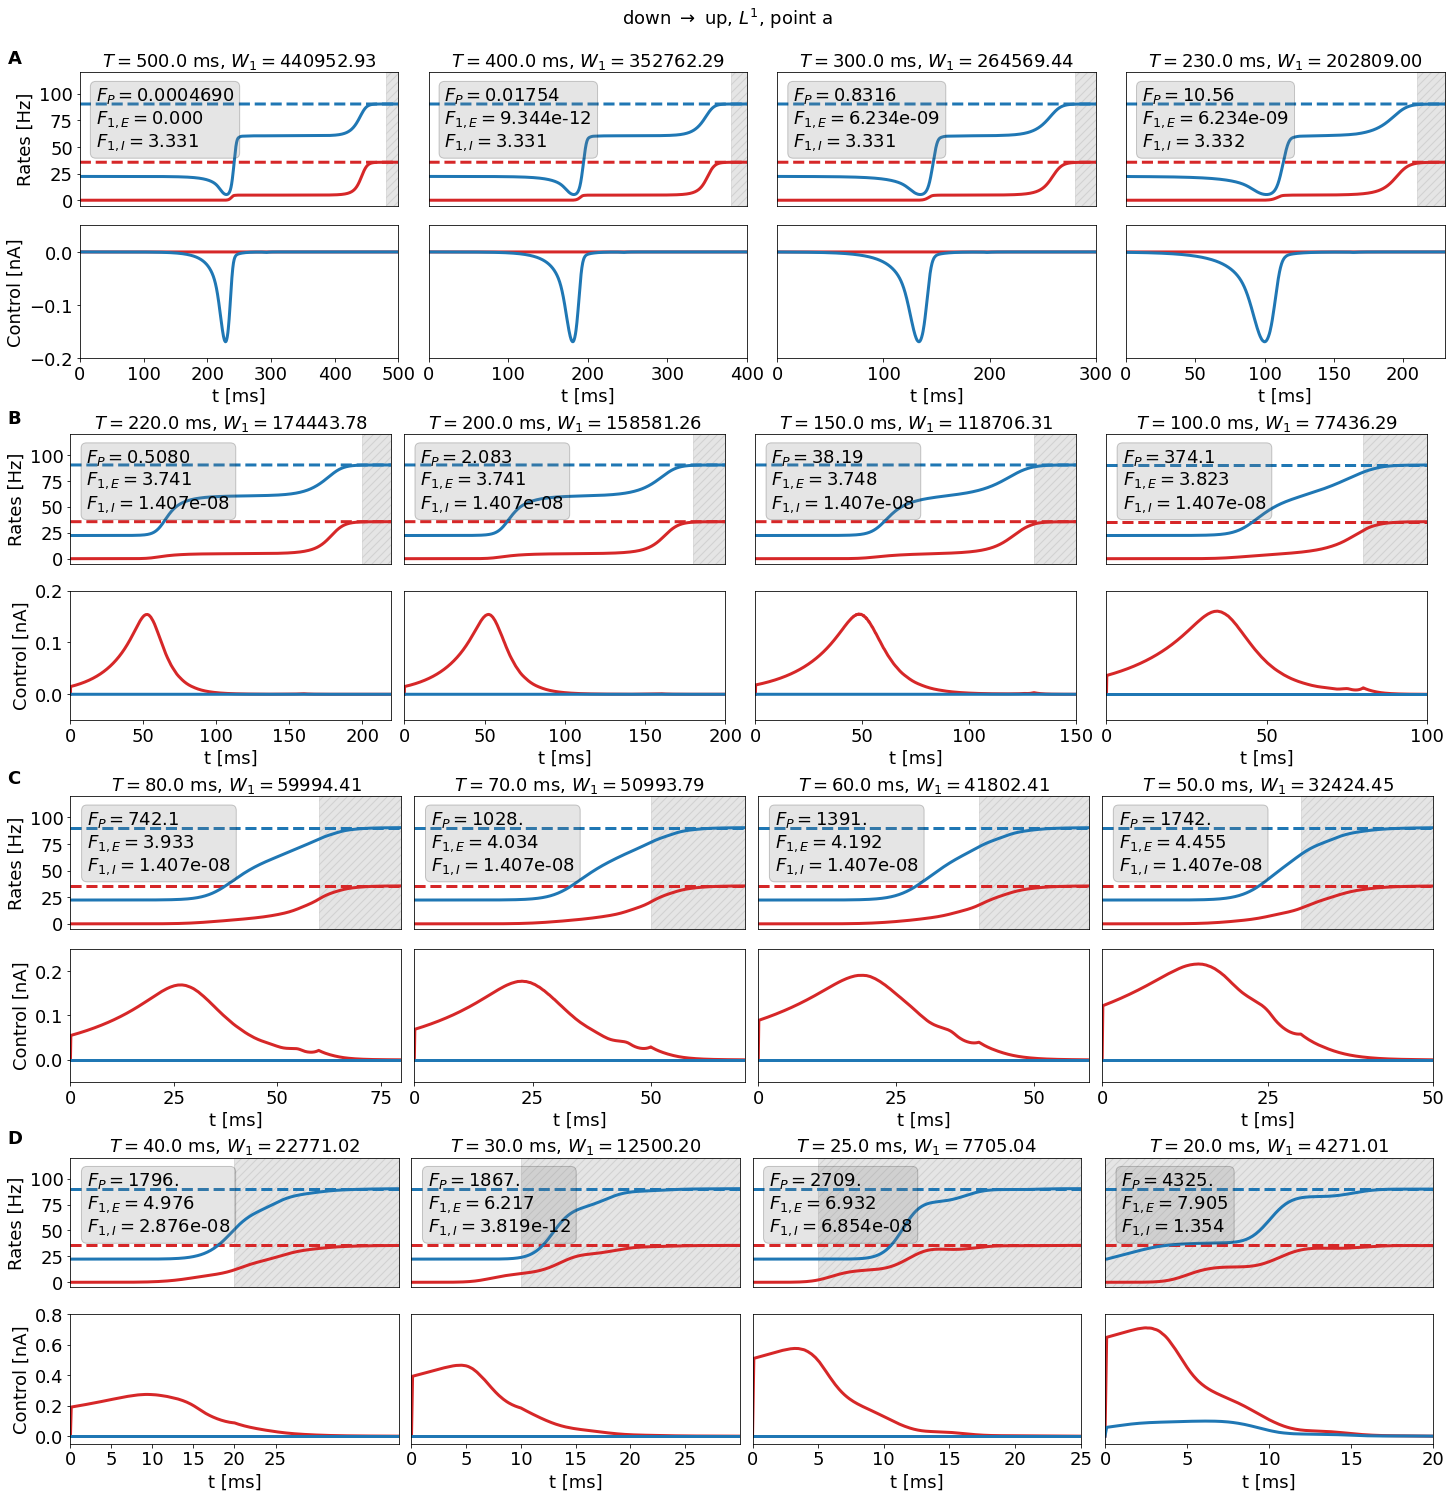

In [68]:
index_ = [ #[0, 1000, 2000, 3900], 
          #[2900, 3400, 3800, 4200],
          [0, 1000, 2000, 2700],
          [2800, 3000, 3500, 4000],
          [4200, 4300, 4400, 4500],
          #[4300, 4400, 4500, 4600],
          [4600, 4700, 4750, 4800] ]

y_lim = [ [[-0.2, 0.05], [-0.2, 0.05], [-0.2, 0.05], [-0.2, 0.05] ],
          [[-0.05, 0.2], [-0.05, 0.2], [-0.05, 0.2], [-0.05, 0.2] ],
          [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.8], [-0.05, 0.8], [-0.05, 0.8], [-0.05, 0.8] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0.], [], [], [] ],
            [np.arange(0.,0.3,0.1), [], [], [] ],
            [np.arange(0.,0.3,0.1), [], [], [] ],
            [np.arange(0.,0.9,0.2), [], [], [] ],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()

In [108]:
i = 50

In [127]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3810
3820
3830
3840
3850
3860
3870
3880
3890
3900
3910
3920
3930
3940
3950
3960
3970
3980
3990
4000
4010
4020
4030
4040
4050
4060
4070
4080
4090
4100
4110
4120
4130
4140
4150
4160
4170
4180
4190
4200
4210
4220
4230
4240
4250
4260
4270
4280
4290
4300
4310
4320
4330
4340
4350
4360
4370
4380
4390
4400
4410
4420
4430
4440
4450
4460
4470
4480
4490
4500
4510
4520
4530
4540
4550
4560
4570
4580
4590
4600
4610
4620
4630
4640
4650
4660
4670
4680
4690
4700
4710
4720
4730
4740
4750
4760
4770
4780
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800


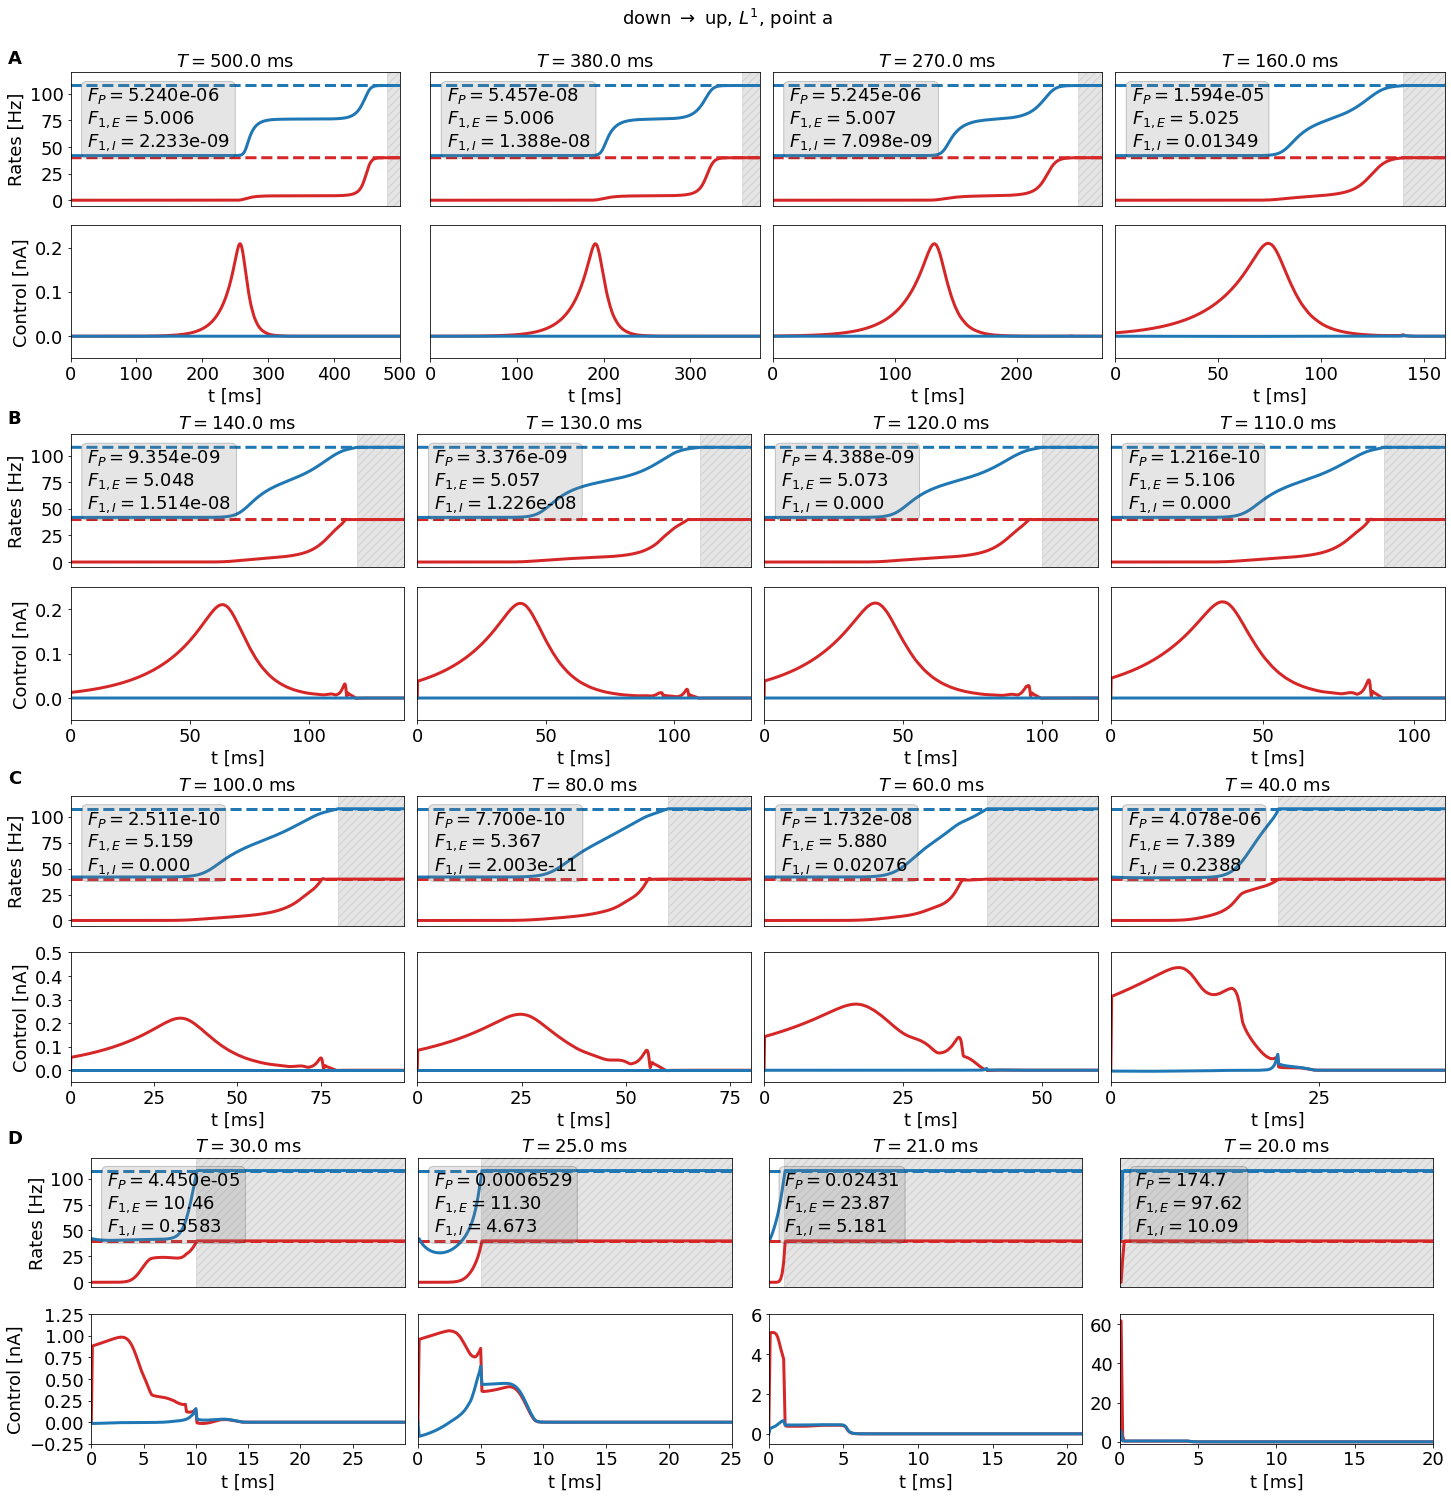

In [130]:
index_ = [ [0, 1200, 2300, 3400], 
          [3600, 3700, 3800, 3900],
          [4000, 4200, 4400, 4600],
          [4700, 4750, 4790, 4800] ]

y_lim = [ [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.5], [-0.05, 0.5], [-0.05, 0.5], [-0.05, 0.5] ],
          [[-.25, 1.25], [-.25, 1.25], [-.5, 6.], [-1., 65.] ]
        ]
y_ticks = [ [np.arange(0., 0.3, 0.1), [], [], [] ],
            [np.arange(0., 0.3, 0.1), [], [], [] ],
            [np.arange(0., 0.6, 0.1), [], [], [] ],
            [np.arange(-0.25, 1.3, 0.25), [], np.arange(0.,8.,2.), np.arange(0.,70.,20.)],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1b, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

In [139]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4410
4420
4430
4440
4450
4460
4470
4480
4490
4500
4510
4520
4530
4540
4550
4560
4570
4580
4590
4600
4610
4620
4630
4640
4650
4660
4670
4680
4690
4700
4710
4720
4730
4740
4750
4760
4770
4780
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800


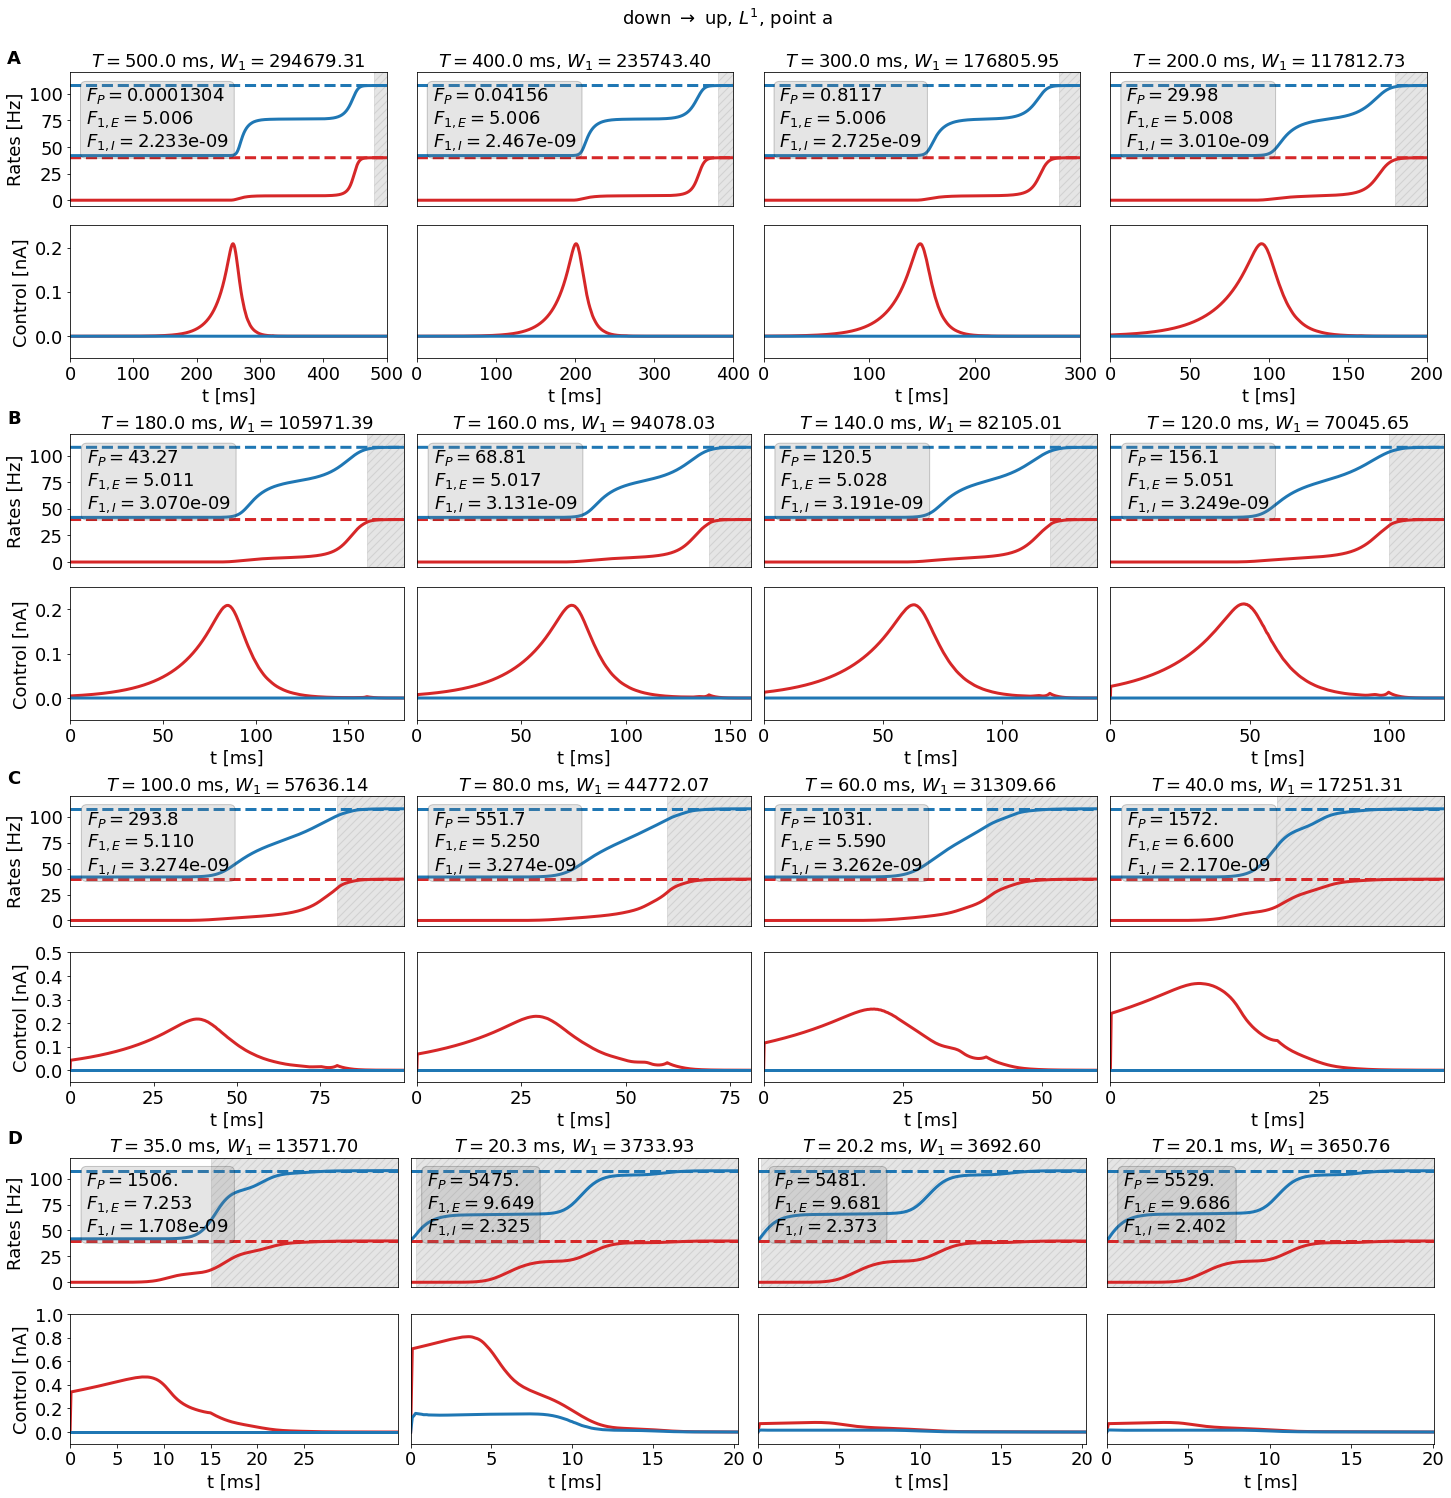

In [140]:
index_ = [ [0, 1000, 2000, 3000], 
          [3200, 3400, 3600, 3800],
          [4000, 4200, 4400, 4600],
          [4650, 4700, 4750, 4790] ]

y_lim = [ [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.5], [-0.05, 0.5], [-0.05, 0.5], [-0.05, 0.5] ],
          [[-.1, 1.], [-.1, 1.], [-1., 10.], [-1., 10.] ]
        ]
y_ticks = [ [np.arange(0., 0.3, 0.1), [], [], [] ],
            [np.arange(0., 0.3, 0.1), [], [], [] ],
            [np.arange(0., 0.6, 0.1), [], [], [] ],
            [np.arange(0., 1.1, 0.2), [], [], []],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1b, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()